In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\hp\Downloads\cardekho_numeric_missing.csv")

In [5]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,price_dollar
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000.0,$12343
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000.0,$5974
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000.0,$15564
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.1,5,226000.0,$2158
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,?,570000.0,$18826


## We have droped the frist column Unnamed:0

In [6]:
df =  df.drop('Unnamed: 0',axis=1)

## we will deal with missing values

In [7]:
df = df.replace("?",np.nan)

In [8]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,price_dollar
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000.0,$12343
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000.0,$5974
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000.0,$15564
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.1,5,226000.0,$2158
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,NaN,570000.0,$18826


In [9]:
df.isnull().sum()

car_name               0
brand                  0
model                  0
vehicle_age          796
km_driven            745
seller_type            0
fuel_type              0
transmission_type      0
mileage              806
engine               753
max_power            776
seats                788
selling_price        765
price_dollar           0
dtype: int64

In [10]:
df.shape

(15411, 14)

### Here we change dollar sign with space for further eda

In [11]:
df['price_dollar'] = df['price_dollar'].str.replace("$","")

### Now i change the number value dtypes to float

In [12]:
numeric_columns =  df[['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price','price_dollar']] 

for cols in numeric_columns:
    df[cols] = pd.to_numeric(df[cols], errors='coerce')
    

In [13]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age          float64
km_driven            float64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
selling_price        float64
price_dollar           int64
dtype: object

In [14]:
df.value_counts()

car_name    brand  model  vehicle_age  km_driven  seller_type  fuel_type  transmission_type  mileage  engine  max_power  seats  selling_price  price_dollar
Volvo XC90  Volvo  XC90   5.0          85000.0    Dealer       Diesel     Automatic          17.20    1969.0  235.00     7.0    4100000.0      2156            1
Audi A4     Audi   A4     2.0          10950.0    Individual   Diesel     Automatic          18.25    1968.0  187.74     5.0    4200000.0      21058           1
                          3.0          17000.0    Dealer       Petrol     Automatic          17.84    1395.0  147.51     5.0    3400000.0      26952           1
                          4.0          25829.0    Dealer       Diesel     Automatic          18.25    1968.0  187.74     5.0    3250000.0      25190           1
                                       28049.0    Dealer       Diesel     Automatic          18.25    1968.0  187.74     5.0    3100000.0      18017           1
                                       

In [15]:
df.values

array([['Maruti Alto', 'Maruti', 'Alto', ..., 5.0, 120000.0, 12343],
       ['Hyundai Grand', 'Hyundai', 'Grand', ..., 5.0, 550000.0, 5974],
       ['Hyundai i20', 'Hyundai', 'i20', ..., 5.0, 215000.0, 15564],
       ...,
       ['Skoda Rapid', 'Skoda', 'Rapid', ..., 5.0, 425000.0, 29793],
       ['Mahindra XUV500', 'Mahindra', 'XUV500', ..., 7.0, 1225000.0,
        11869],
       ['Honda City', 'Honda', 'City', ..., 5.0, nan, 2213]],
      shape=(15411, 14), dtype=object)

In [16]:
df.isnull().sum()

car_name               0
brand                  0
model                  0
vehicle_age          796
km_driven            745
seller_type            0
fuel_type              0
transmission_type      0
mileage              806
engine               753
max_power            776
seats                788
selling_price        765
price_dollar           0
dtype: int64

### replace vehicle AGE  with mode most frequent values

In [17]:
df['vehicle_age'].value_counts()

vehicle_age
4.0     2151
5.0     2003
6.0     1815
3.0     1814
7.0     1367
8.0     1228
2.0     1086
9.0      978
10.0     678
11.0     515
12.0     286
13.0     225
1.0      201
14.0     124
15.0      78
16.0      25
17.0      16
18.0      10
19.0       5
0.0        4
21.0       3
29.0       1
22.0       1
25.0       1
Name: count, dtype: int64

In [18]:
df['vehicle_age'].fillna(4.0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\1273593505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vehicle_age'].fillna(4.0,inplace=True)


In [19]:
df['vehicle_age'].value_counts()

vehicle_age
4.0     2947
5.0     2003
6.0     1815
3.0     1814
7.0     1367
8.0     1228
2.0     1086
9.0      978
10.0     678
11.0     515
12.0     286
13.0     225
1.0      201
14.0     124
15.0      78
16.0      25
17.0      16
18.0      10
19.0       5
0.0        4
21.0       3
29.0       1
22.0       1
25.0       1
Name: count, dtype: int64

In [20]:
df.isnull().sum()

car_name               0
brand                  0
model                  0
vehicle_age            0
km_driven            745
seller_type            0
fuel_type              0
transmission_type      0
mileage              806
engine               753
max_power            776
seats                788
selling_price        765
price_dollar           0
dtype: int64

In [23]:
df['km_driven'].value_counts()

km_driven
50000.0    530
40000.0    457
70000.0    439
60000.0    424
30000.0    342
          ... 
31180.0      1
52427.0      1
64471.0      1
33869.0      1
75510.0      1
Name: count, Length: 3534, dtype: int64

#### We will replace km driven with mean

In [24]:
km_driven_mean = df['km_driven'].mean()

In [25]:
km_driven_mean

np.float64(55714.475726169374)

In [26]:
df['km_driven'].fillna(km_driven_mean,inplace=True)

In [27]:
df.isnull().sum()

car_name               0
brand                  0
model                  0
vehicle_age            0
km_driven              0
seller_type            0
fuel_type              0
transmission_type      0
mileage              806
engine               753
max_power            776
seats                788
selling_price        765
price_dollar           0
dtype: int64

### Replace seats with mode the most frequent

In [28]:
df['seats'].value_counts()

seats
5.0    12242
7.0     1837
8.0      291
6.0      122
4.0       74
9.0       48
2.0        7
0.0        2
Name: count, dtype: int64

In [29]:
df['seats'].fillna(5.0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\25091086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seats'].fillna(5.0,inplace=True)


In [30]:
df.isnull().sum()

car_name               0
brand                  0
model                  0
vehicle_age            0
km_driven              0
seller_type            0
fuel_type              0
transmission_type      0
mileage              806
engine               753
max_power            776
seats                  0
selling_price        765
price_dollar           0
dtype: int64

### Take mean for mileage engine and selling price

In [31]:
mileage_avg = df['mileage'].mean()

In [32]:
mileage_avg

np.float64(19.70659568640876)

In [33]:
df['mileage'].fillna(mileage_avg,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\956962378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(mileage_avg,inplace=True)


In [35]:
engine_avg = df['engine'].mean()

In [36]:
df['engine'].fillna(engine_avg,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\1742208002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(engine_avg,inplace=True)


In [37]:
max_power_avg = df['max_power'].mean()

In [38]:
df['max_power'].fillna(max_power_avg,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\1133170083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(max_power_avg,inplace=True)


In [39]:
selling_price_avg = df['selling_price'].mean()

df['selling_price'].fillna(selling_price_avg,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4616\3554255968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selling_price'].fillna(selling_price_avg,inplace=True)


In [40]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
price_dollar         0
dtype: int64

### changes the column name from engine to engine size


In [62]:
df = df.rename(columns={
    'engine' : 'Engine Size',
    'max_power' : 'Hourse power'
})

In [43]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,Engine Size,max_power,seats,selling_price,price_dollar
0,Maruti Alto,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,120000.0,12343
1,Hyundai Grand,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,550000.0,5974
2,Hyundai i20,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,215000.0,15564
3,Maruti Alto,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,226000.0,2158
4,Ford Ecosport,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,570000.0,18826


In [44]:
df['price in PKR'] = df['selling_price'] * 3.18

In [45]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,Engine Size,max_power,seats,selling_price,price_dollar,price in PKR
0,Maruti Alto,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,120000.0,12343,381600.0
1,Hyundai Grand,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,550000.0,5974,1749000.0
2,Hyundai i20,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,215000.0,15564,683700.0
3,Maruti Alto,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,226000.0,2158,718680.0
4,Ford Ecosport,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,570000.0,18826,1812600.0


In [49]:
df = df.drop('selling_price',axis=1)

In [63]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,Engine Size,Hourse power,seats,price_dollar,price in PKR
0,Maruti Alto,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,12343,381600.0
1,Hyundai Grand,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5974,1749000.0
2,Hyundai i20,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,15564,683700.0
3,Maruti Alto,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,2158,718680.0
4,Ford Ecosport,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,18826,1812600.0


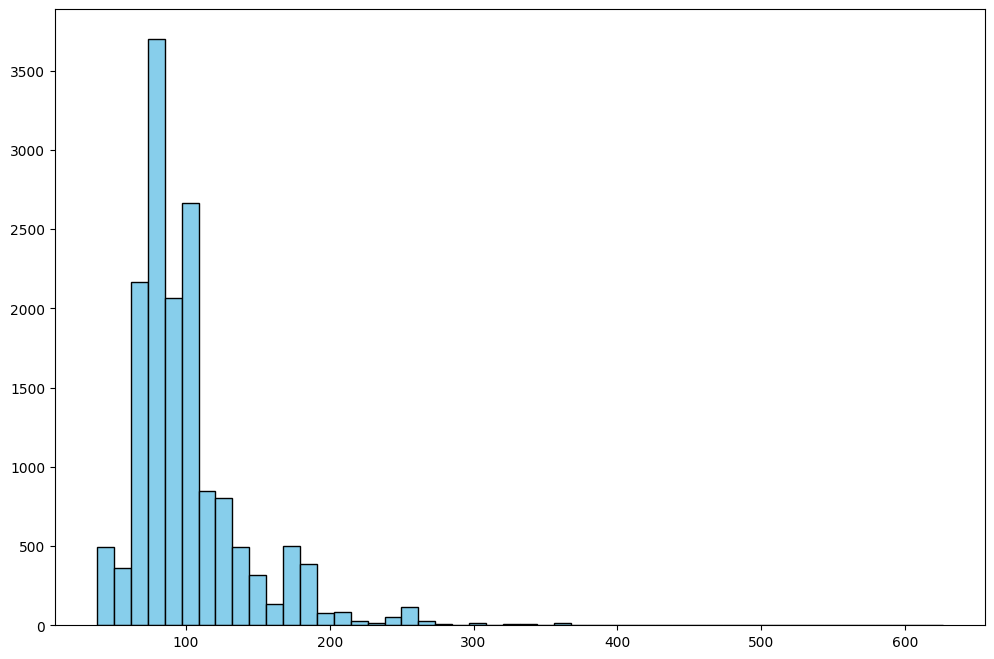

In [77]:
plt.figure(figsize=(12,8))
plt.hist(df['Hourse power'], bins=50, color='skyblue', edgecolor='black')
plt.show()